# Sinatra Versus

![SegmentLocal](img/1.jpg "segment")


# Frank Sinatra

![SegmentLocal](img/1.gif "segment")

In [2]:
import os      
import pandas as pd
import plotly.graph_objects as go
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from collections import Counter
import nltk
from nltk.corpus import stopwords


folder = "./Data/Frank Sinatra Greatest Hits/"
txt_files = os.listdir(folder)
#print(txt_files)

In [5]:
import pandas as pd
corpus = []

for i in txt_files:
    with open(folder+i,encoding='utf8') as f_input:
        corpus.append(f_input.read())

#print(corpus)

In [7]:
words_list = []

for phrase in corpus:
    words_list.append((str(phrase)).split())
#print(words_list)

In [10]:
words_corpus = []
for words in words_list:
    for word in words:
        words_corpus.append(word)
#print(words_corpus)

In [11]:
from collections import Counter

word_count = Counter(words_corpus)
a = 0
#print(word_count.most_common())

for i in word_count.most_common():
    a += (i[1])
print(a)
#print(word_count.most_common())

4986


In [12]:
print(len(word_count.most_common()))

1134


In [19]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

lang = 'english'
count = 10
new_string = " ".join(corpus)
lsa = LsaSummarizer(Stemmer(lang))
lsa.stop_words = get_stop_words(lang)
parser = PlaintextParser.from_string(new_string, Tokenizer(lang))
lsa_summary = lsa(parser.document, count)
lsa_s = [str(sent) for sent in lsa_summary]
summary = ' '.join(lsa_s)

print(summary)



No, I'd rather, rather have nothing at all Please don't bring your lips so close to my cheek Don't you smile or I'll be lost beyond recall The kiss in your eyes, the touch of your hand makes me weak And my heart, it may grow dizzy and fall And if I fell under the spell of your call I would be, I'd be caught in the undertow So you see, I have got to say no, no All or nothing at all All or nothing at all Nothing at all There ain't nothing at all Nothing at all When somebody loves you It's no good unless he loves you all the way Happy to be near you When you need someone to cheer you all the way Taller than the tallest tree is That's how it's got to feel Deeper than the deep blue sea is That's how deep it goes if it's real When somebody needs you It's no good unless he needs you all the way Through the good or lean years And for all the in between years come what may Who knows where the road will lead us? It's big, but it's a saloon This one was written by Tom Adair and Matt Dennis And wi

In [22]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = ""
#print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
# Instantiates a client
client = language.LanguageServiceClient()
# The text to analyze

neg = 0
pos = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)

    #print('Text: {}'.format(text))
    analysis = ''
    if sentiment.score == 0:
        analysis = 'Neutral'
        neu+=1
    elif sentiment.score < 0:
        analysis = 'Negative'
        neg+=1
    elif sentiment.score > 0 and sentiment.score < 0.5 :
        analysis = 'Slightly Positive'
        s_pos+=1
    else:
        analysis = 'Positive'
        pos+=1
    print('Document: '+ txt_files[i][:-4] )
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))
    print("")
    print("")
sentiment_analysis = [pos, s_pos, neu, neg]
names_analysis = ["Positive", "Slightly Positive", "Neutral", "Negative"]


    #print('Sentiment: {}'.format(response))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Document: All My Tomorrows
Sentiment Prediction: 0.6000000238418579, Sentiment Analysis: Positive


Document: All or Nothing at All
Sentiment Prediction: -0.6000000238418579, Sentiment Analysis: Negative


Document: All the Way
Sentiment Prediction: 0.20000000298023224, Sentiment Analysis: Slightly Positive


Document: Angel Eyes
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Autumn In New York
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Fly Me to the Moon
Sentiment Prediction: 0.800000011920929, Sentiment Analysis: Positive


Document: I Get A Kick Out of You
Sentiment Prediction: -0.699999988079071, Sentiment Analysis: Negative


Document: I've Got A Crush on You
Sentiment Prediction: 0.6000000238418579, Sentiment Analysis: Positive


Document: I've Got the World On A String
Sentiment Prediction: 0.8999999761581421, Sentiment Analysis: Positive


Document: In the Wee Small Hours of the Morning
Sentiment Prediction: -0.69999

In [23]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []

numbers = []

consumers = []

events = []

locations = []

organizations = []

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    person = []
    number = []
    consumer = []
    event = []
    location = []
    organization = []
    
    for j in range(len(response.entities)):
        if (response.entities[j].type) == 1:
            person.append(response.entities[j].name)
            persons.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 12:
            number.append(response.entities[j].name)
            numbers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 6:
            consumer.append(response.entities[j].name)
            consumers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 4:
            event.append(response.entities[j].name)
            events.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 2:
            location.append(response.entities[j].name)
            locations.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 3:
            organization.append(response.entities[j].name)
            organizations.append(str(response.entities[j].name))
        
    print('Person Entities Named in '+txt_files[i][:-4] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+txt_files[i][:-4] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+txt_files[i][:-4] + " Letter")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+txt_files[i][:-4] + " Letter")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+txt_files[i][:-4] + " Letter")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+txt_files[i][:-4] + " Letter")
    print(organization)
    org += len(organization)
    print("")
    print("")
        
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Person Entities Named in All My Tomorrows Letter
['That', 'No one']

Number Entities Named in All My Tomorrows Letter
['one', 'two']

Consumer Entities Named in All My Tomorrows Letter
[]

Event Entities Named in All My Tomorrows Letter
[]

Location Entities Named in All My Tomorrows Letter
[]

Organization Entities Named in All My Tomorrows Letter
[]


Person Entities Named in All or Nothing at All Letter
['Half']

Number Entities Named in All or Nothing at All Letter
[]

Consumer Entities Named in All or Nothing at All Letter
[]

Event Entities Named in All or Nothing at All Letter
[]

Location Entities Named in All or Nothing at All Letter
[]

Organization Entities Named in All or Nothing at All Letter
[]


Person Entities Named in All the Way Letter
['somebody', 'somebody', 'someone', 'fool']

Number Entities Named in All the Way Letter
[]

Consumer Entities Named in All the Way Letter
[]

Event Entities Named in All the Way Letter
[]

Location Entities Named in All the Way Letter


Person Entities Named in One for my Baby Letter
['no one', 'baby', 'Joe I', 'friend', 'baby', 'buddy', 'poet', 'baby']

Number Entities Named in One for my Baby Letter
['one', 'one', 'three', 'one', 'one', 'one', 'one', 'one']

Consumer Entities Named in One for my Baby Letter
['machine']

Event Entities Named in One for my Baby Letter
[]

Location Entities Named in One for my Baby Letter
['place', 'road', 'road', 'road', 'road']

Organization Entities Named in One for my Baby Letter
[]


Person Entities Named in Put Your Dreams Away Letter
['star', 'darling', 'darling']

Number Entities Named in Put Your Dreams Away Letter
[]

Consumer Entities Named in Put Your Dreams Away Letter
[]

Event Entities Named in Put Your Dreams Away Letter
[]

Location Entities Named in Put Your Dreams Away Letter
[]

Organization Entities Named in Put Your Dreams Away Letter
[]


Person Entities Named in Saturday night is the loneliest night of the week Letter
['night friends']

Number Entities Named in 

In [24]:
types = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [25]:
fig = go.Figure(data=[go.Pie(labels=types, values=total_num, title="Pie Chart of Entity Analysis of Season 1")])
fig.show()

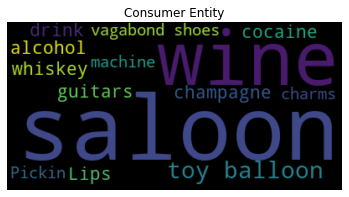

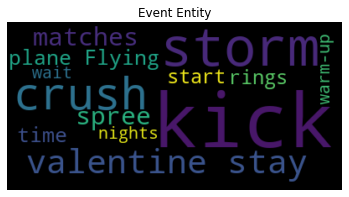

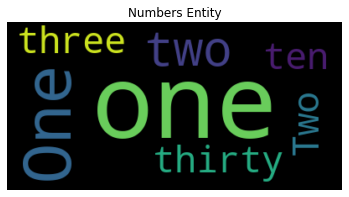

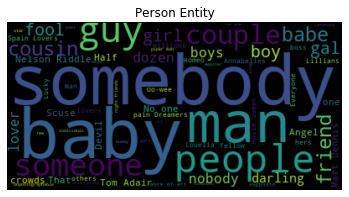

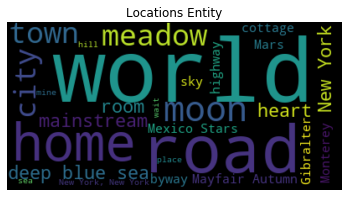

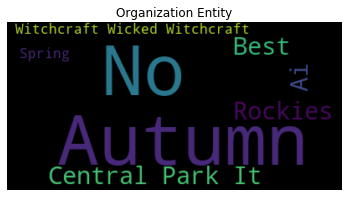

In [26]:
wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))


# Display the generated image:

plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(events))


# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))


# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(persons))


# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(locations))


# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))


# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
from google.cloud.language import types
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)
    
    for j in range(len(response3.categories)):
        print('Classification of Letter '+ txt_files[i][:-4] )
        print((response3.categories[j].name))
        print("")
        print("")
    #print((response3.categories))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
   # answer = ''
   # if response3 == '':
    #    answer='No Classification Determined'
    
    #else:
    #    answer = response3.name
    #print('Classification: {}'.format(answer))

Classification of Letter All My Tomorrows
/Arts & Entertainment


Classification of Letter All or Nothing at All
/Arts & Entertainment


Classification of Letter All the Way
/Arts & Entertainment/Music & Audio


Classification of Letter Angel Eyes
/Arts & Entertainment/Music & Audio


Classification of Letter Fly Me to the Moon
/Arts & Entertainment/Music & Audio


Classification of Letter I've Got the World On A String
/Arts & Entertainment/Music & Audio/Music Reference


Classification of Letter In the Wee Small Hours of the Morning
/Arts & Entertainment


Classification of Letter It happened in Monterey
/Arts & Entertainment/Music & Audio


Classification of Letter It's Been a Long Long Time
/Arts & Entertainment


Classification of Letter Let It Snow! Let It Snow! Let It Snow!
/News/Weather


Classification of Letter Love is Here to Stay
/Arts & Entertainment


Classification of Letter My Cousin Louella
/Arts & Entertainment/Movies


Classification of Letter My Funny Valentine
/Art

# Nancy Sinatra

![SegmentLocal](img/2.gif "segment")

In [4]:

folder = "./Data/Nancy Sinatra Greatest Hits/"
txt_files = os.listdir(folder)
#print(txt_files)

In [5]:
import pandas as pd
corpus = []

for i in txt_files:
    with open(folder+i,encoding='utf8') as f_input:
        corpus.append(f_input.read())

#print(corpus)

In [6]:
words_list = []

for phrase in corpus:
    words_list.append((str(phrase)).split())
#print(words_list)

In [7]:
words_corpus = []
for words in words_list:
    for word in words:
        words_corpus.append(word)
#print(words_corpus)

In [8]:
from collections import Counter

word_count = Counter(words_corpus)
a = 0
#print(word_count.most_common())

for i in word_count.most_common():
    a += (i[1])
print(a)
#print(word_count.most_common())

5804


In [9]:
print(len(word_count.most_common()))

1319


In [10]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

lang = 'english'
count = 10
new_string = " ".join(corpus)
lsa = LsaSummarizer(Stemmer(lang))
lsa.stop_words = get_stop_words(lang)
parser = PlaintextParser.from_string(new_string, Tokenizer(lang))
lsa_summary = lsa(parser.document, count)
lsa_s = [str(sent) for sent in lsa_summary]
summary = ' '.join(lsa_s)

print(summary)



All the time I know this dress I'm wearing doesn't hide the secret I have tried concealing When he left he promised me he'd be back by the time it was revealing The sun behind a cloud just casts the crawling shadow over the fields of clover And time is running out for me, I wish that he would hurry down from Dover And I've gone so long, when I left the snow was deep upon the ground And she has seen the spring and summer comin' now the leaves are turning brown At any time a tiny face will show itself the waiting's almost over But she won't have a name to give it if I don't hurry down from Dover My folks weren't understanding, when they found out they sent me from the home place My daddy said if folks found out he'd be ashamed to ever show his face My mamma said I was a fool, she did not believe it when I told her That everything would be all right 'cause soon he would be coming down from Dover She loved me more than anything she could not refuse me when I needed her She was the only one

In [12]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/acham/Desktop/sinatra.json"
#print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
# Instantiates a client
client = language.LanguageServiceClient()
# The text to analyze

neg = 0
pos = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)

    #print('Text: {}'.format(text))
    analysis = ''
    if sentiment.score == 0:
        analysis = 'Neutral'
        neu+=1
    elif sentiment.score < 0:
        analysis = 'Negative'
        neg+=1
    elif sentiment.score > 0 and sentiment.score < 0.5 :
        analysis = 'Slightly Positive'
        s_pos+=1
    else:
        analysis = 'Positive'
        pos+=1
    print('Document: '+ txt_files[i][:-4] )
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))
    print("")
    print("")
sentiment_analysis = [pos, s_pos, neu, neg]
names_analysis = ["Positive", "Slightly Positive", "Neutral", "Negative"]


    #print('Sentiment: {}'.format(response))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Document: Bang Bang
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: Burnin' Down the Spark
Sentiment Prediction: -0.5, Sentiment Analysis: Negative


Document: Did You Ever
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: Down from Dover
Sentiment Prediction: -0.699999988079071, Sentiment Analysis: Negative


Document: Drummer Man
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Elusive Dreams
Sentiment Prediction: -0.699999988079071, Sentiment Analysis: Negative


Document: Friday's Child
Sentiment Prediction: -0.800000011920929, Sentiment Analysis: Negative


Document: God Knows I Love You
Sentiment Prediction: 0.800000011920929, Sentiment Analysis: Positive


Document: Greenwich Village Folk Song
Sentiment Prediction: -0.6000000238418579, Sentiment Analysis: Negative


Document: How Are Things in California
Sentiment Prediction: -0.699999988079071, Sentiment Analysis: Negative


Document: How 

In [13]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []

numbers = []

consumers = []

events = []

locations = []

organizations = []

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    person = []
    number = []
    consumer = []
    event = []
    location = []
    organization = []
    
    for j in range(len(response.entities)):
        if (response.entities[j].type) == 1:
            person.append(response.entities[j].name)
            persons.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 12:
            number.append(response.entities[j].name)
            numbers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 6:
            consumer.append(response.entities[j].name)
            consumers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 4:
            event.append(response.entities[j].name)
            events.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 2:
            location.append(response.entities[j].name)
            locations.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 3:
            organization.append(response.entities[j].name)
            organizations.append(str(response.entities[j].name))
        
    print('Person Entities Named in '+txt_files[i][:-4] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+txt_files[i][:-4] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+txt_files[i][:-4] + " Letter")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+txt_files[i][:-4] + " Letter")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+txt_files[i][:-4] + " Letter")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+txt_files[i][:-4] + " Letter")
    print(organization)
    org += len(organization)
    print("")
    print("")
        
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Person Entities Named in Bang Bang Letter
['baby', 'people']

Number Entities Named in Bang Bang Letter
['five', 'six']

Consumer Entities Named in Bang Bang Letter
['sound Bang bang', 'sound Bang bang', 'sound Bang bang']

Event Entities Named in Bang Bang Letter
[]

Location Entities Named in Bang Bang Letter
[]

Organization Entities Named in Bang Bang Letter
[]


Person Entities Named in Burnin' Down the Spark Letter
[]

Number Entities Named in Burnin' Down the Spark Letter
['one']

Consumer Entities Named in Burnin' Down the Spark Letter
['tires', 'car']

Event Entities Named in Burnin' Down the Spark Letter
['Round', 'round']

Location Entities Named in Burnin' Down the Spark Letter
['river', 'street', 'city']

Organization Entities Named in Burnin' Down the Spark Letter
[]


Person Entities Named in Did You Ever Letter
['father']

Number Entities Named in Did You Ever Letter
['nine', 'one', 'Eight']

Consumer Entities Named in Did You Ever Letter
[]

Event Entities Named in Did

Person Entities Named in So Long Babe Letter
['babe', 'babe', 'babe', 'babe', 'babe', 'somebody', 'babe', 'babe', 'babe', 'babe', 'babe', 'babe', 'babe', 'babe', 'Ah']

Number Entities Named in So Long Babe Letter
[]

Consumer Entities Named in So Long Babe Letter
[]

Event Entities Named in So Long Babe Letter
[]

Location Entities Named in So Long Babe Letter
[]

Organization Entities Named in So Long Babe Letter
[]


Person Entities Named in Some Velvet Morning Letter
['Phaedra']

Number Entities Named in Some Velvet Morning Letter
[]

Consumer Entities Named in Some Velvet Morning Letter
['Flowers']

Event Entities Named in Some Velvet Morning Letter
['bout', 'bout', 'bout']

Location Entities Named in Some Velvet Morning Letter
['hill', 'hill']

Organization Entities Named in Some Velvet Morning Letter
[]


Person Entities Named in Something Stupid Letter
['stars', 'stars']

Number Entities Named in Something Stupid Letter
['two']

Consumer Entities Named in Something Stupid Lette

In [14]:
types = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [15]:
fig = go.Figure(data=[go.Pie(labels=types, values=total_num, title="Pie Chart of Entity Analysis of Season 1")])
fig.show()

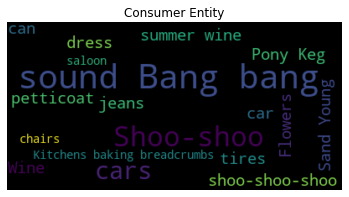

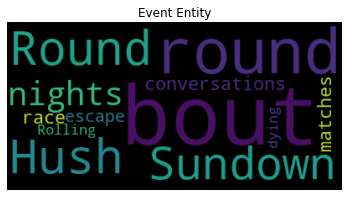

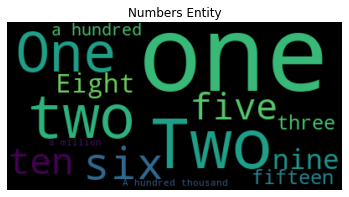

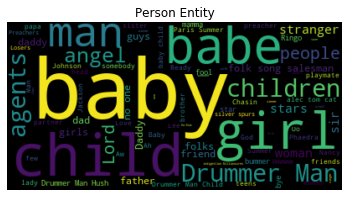

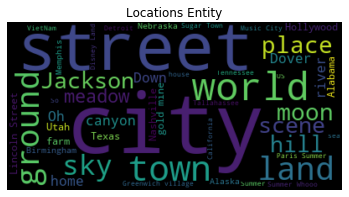

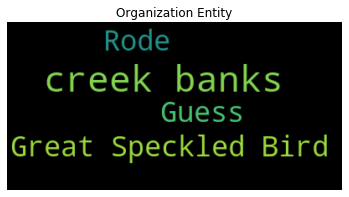

In [16]:
wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))


# Display the generated image:

plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(events))


# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))


# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(persons))


# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(locations))


# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))


# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
from google.cloud.language import types
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)
    
    for j in range(len(response3.categories)):
        print('Classification of Letter '+ txt_files[i][:-4] )
        print((response3.categories[j].name))
        print("")
        print("")
    #print((response3.categories))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
   # answer = ''
   # if response3 == '':
    #    answer='No Classification Determined'
    
    #else:
    #    answer = response3.name
    #print('Classification: {}'.format(answer))

Classification of Letter Bang Bang
/Arts & Entertainment


Classification of Letter Burnin' Down the Spark
/Arts & Entertainment


Classification of Letter Drummer Man
/Arts & Entertainment/Music & Audio


Classification of Letter God Knows I Love You
/Arts & Entertainment/Music & Audio/Music Reference


Classification of Letter Greenwich Village Folk Song
/Arts & Entertainment/Music & Audio


Classification of Letter How Does That Grab You
/Arts & Entertainment/Music & Audio


Classification of Letter It's for my Dad
/Arts & Entertainment


Classification of Letter Jackson
/Arts & Entertainment


Classification of Letter Lady Bird
/Arts & Entertainment/Music & Audio


Classification of Letter Lightning's Girl
/Arts & Entertainment


Classification of Letter Love Eyes
/Arts & Entertainment


Classification of Letter Paris Summer
/Travel


Classification of Letter Sand
/Arts & Entertainment/Music & Audio


Classification of Letter Shot You Down
/Arts & Entertainment


Classification of 